In [273]:
#### LIBRAIRIES ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [274]:
#### DATA IMPORT ####
data = pd.read_csv('../data/HR_Data_cleaned.csv')
data.drop('Unnamed: 0', axis = 1, inplace=True)
data.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevant experience,Full time course,Graduate,STEM,9,0-10,Unknown,1,21,1.0
1,9858,city_103,0.920,Female,Has relevant experience,No enrollment,Graduate,STEM,5,Unknown,Pvt Ltd,1,98,0.0
2,31806,city_21,0.624,Male,No relevant experience,No enrollment,High School,Unknown,0,Unknown,Pvt Ltd,0,15,0.0
3,27385,city_13,0.827,Male,Has relevant experience,No enrollment,Masters,STEM,11,10-49,Pvt Ltd,1,39,1.0
4,27724,city_103,0.920,Male,Has relevant experience,No enrollment,Graduate,STEM,21,10000+,Pvt Ltd,5,72,0.0


In [275]:
#### CATEGORICAL COLUMNS ORDERING ####
cats_education_level = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd', 'Unknown']
data.education_level = pd.Categorical(data.education_level, ordered = True, categories = cats_education_level)

cats_enrolled_university = ['No enrollment', 'Part time course', 'Full time course', 'Unknown']
data.enrolled_university = pd.Categorical(data.enrolled_university, ordered=True, categories=cats_enrolled_university)

cats_company_size = ['0-10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+', 'Unknown']
data.company_size = pd.Categorical(data.company_size, ordered=True, categories=cats_company_size)

# The order of below categories is artificial (e.g. no <> relationship between Male and Female)
# and based on cardinality
# but it enables us to put 'Other' and 'Unknown' at the very right

cats_gender = ['Male', 'Female', 'Other', 'Unknown']
data.gender = pd.Categorical(data.gender, ordered=True, categories=cats_gender)

cats_major_discipline = ['STEM', 'Humanities', 'Business Degree', 'Arts', 'Other', 'No Major', 'Unknown']
data.major_discipline = pd.Categorical(data.major_discipline, ordered=True, categories=cats_major_discipline)

cats_company_type = ['Pvt Ltd', 'Public Sector', 'Funded Startup', 'Early Stage Startup', 'NGO', 'Other', 'Unknown']
data.company_type = pd.Categorical(data.company_type, ordered=True, categories=cats_company_type)

In [276]:
#### T-TEST ####
# This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.
# This test assumes that the populations have identical variances by default.

# Relevant experience
st.ttest_ind(data.loc[data['relevant_experience'] == 'Has relevant experience'].target, data.loc[data['relevant_experience'] == 'No relevant experience'].target)
# p-value is 0.439, we cannot reject the null hypothesis
# i.e. People with relevant experience have the same likelihood to look for a new job that those with no relevant experience.

Ttest_indResult(statistic=0.7739278159237102, pvalue=0.4390747184048025)

In [277]:
##### ONE-WAY ANOVA TEST ####
# The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.
# The test is applied to samples from two or more groups, possibly with differing sizes.

# We perform a one-way ANOVA test for each categorical column.

for col in data.select_dtypes(include=['category']):
    l_subsets = []
    for cat in data[col].cat.categories:
        l_subsets.append(data.loc[data[col] == cat])
    fvalue, pvalue =st.f_oneway(*[subset.target for subset in l_subsets])
    print(data.groupby(by=col).target.mean())
    print(pvalue)
    print('-----------')

# All p-values are well above 5%, we cannot reject the null hypothesis
# i.e. no significant differences between categories in terms of likelihood to look for a new job or not.

gender
Male       0.247982
Female     0.238806
Other      0.090909
Unknown    0.279310
Name: target, dtype: float64
0.22065522137003274
-----------
enrolled_university
No enrollment       0.243938
Part time course    0.253846
Full time course    0.274834
Unknown             0.312500
Name: target, dtype: float64
0.6598734836444402
-----------
education_level
Primary School    0.250000
High School       0.303571
Graduate          0.242660
Masters           0.254310
Phd               0.301887
Unknown           0.100000
Name: target, dtype: float64
0.5433348594858955
-----------
major_discipline
STEM               0.246980
Humanities         0.266667
Business Degree    0.222222
Arts               0.294118
Other              0.314286
No Major           0.142857
Unknown            0.281481
Name: target, dtype: float64
0.7745919847416405
-----------
company_size
0-10         0.253247
10-49        0.230303
50-99        0.253012
100-500      0.254839
500-999      0.277108
1000-4999    0.257143


<AxesSubplot:xlabel='training_hours', ylabel='Count'>

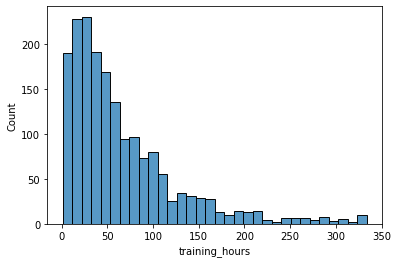

In [278]:
sns.histplot(data.training_hours)

<AxesSubplot:xlabel='relevant_experience', ylabel='training_hours'>

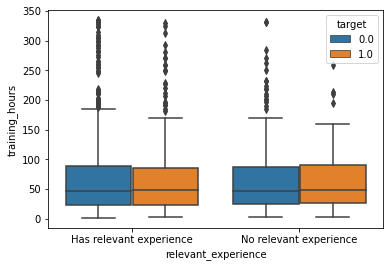

In [279]:
sns.boxplot(x= 'relevant_experience',y= 'training_hours',data = data, hue='target')

<AxesSubplot:xlabel='relevant_experience', ylabel='city_development_index'>

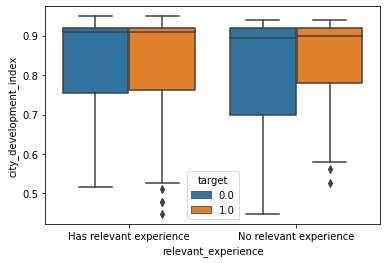

In [280]:
sns.boxplot(x= 'relevant_experience',y= 'city_development_index',data = data, hue='target')

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

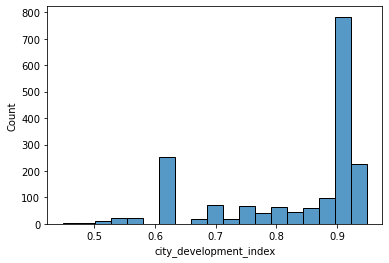

In [281]:
sns.histplot(data.city_development_index)

<AxesSubplot:xlabel='city_development_index', ylabel='education_level'>

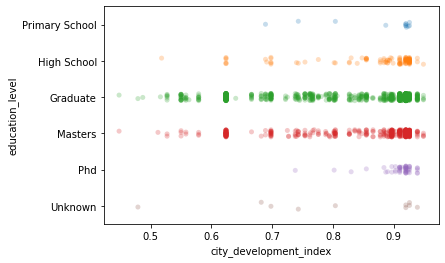

In [372]:
sns.stripplot(x = "city_development_index", y="education_level", data = data, dodge=True, alpha=.25)

<AxesSubplot:xlabel='education_level', ylabel='major_discipline'>

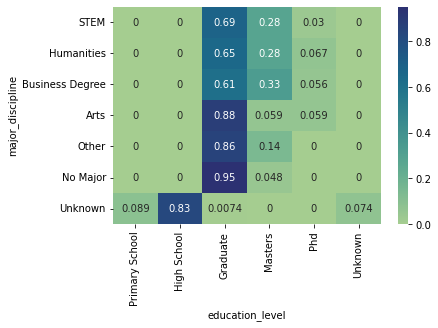

In [283]:
sns.heatmap(pd.crosstab(data.major_discipline, data.education_level, normalize='index'), cmap="crest", annot=True)

In [290]:
cols = data.select_dtypes(include=['category'])

dct = {}
for col in cols:
    l_subsets = []
    for cat in data[col].cat.categories:
        l_subsets.append(data.loc[data[col] == cat])
    fvalue, pvalue =st.f_oneway(*[subset.target for subset in l_subsets])
    #print(data.groupby(by=col).target.mean())
    #print(pvalue)
    #print('-----------')
    dct[col] = pvalue

dct


{'gender': 0.22065522137003274,
 'enrolled_university': 0.6598734836444402,
 'education_level': 0.5433348594858955,
 'major_discipline': 0.7745919847416405,
 'company_size': 0.9988776277084913,
 'company_type': 0.9346336024379293}

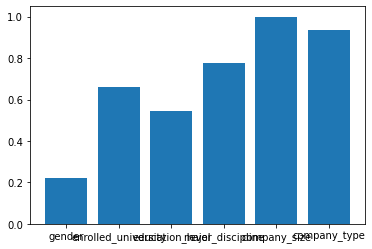

In [292]:
names = list(dct.keys())
values = list(dct.values())

plt.bar(range(len(dct)), values, tick_label=names)
plt.show()

In [293]:
data['current_job_in_career'] = data.last_new_job / data.experience

<AxesSubplot:xlabel='current_job_in_career', ylabel='Count'>

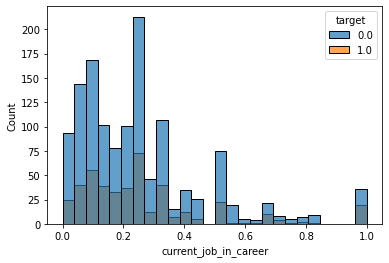

In [298]:
sns.histplot(data = data, x='current_job_in_career', hue = 'target', alpha = 0.7)

<AxesSubplot:xlabel='current_job_in_career', ylabel='Probability'>

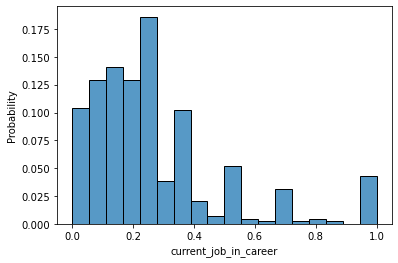

In [300]:
sns.histplot(data = data.loc[data['target'] == 1], x='current_job_in_career', stat = 'probability')

<AxesSubplot:xlabel='current_job_in_career', ylabel='Probability'>

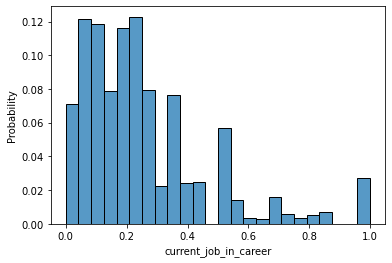

In [301]:
sns.histplot(data = data.loc[data['target'] == 0], x='current_job_in_career', stat = 'probability')

<AxesSubplot:xlabel='current_job_in_career', ylabel='Probability'>

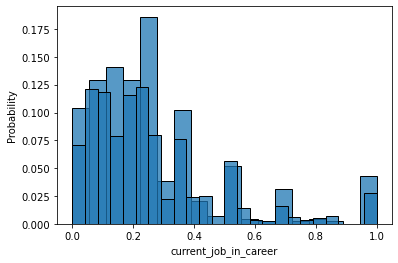

In [306]:
fig = plt.figure()

ax = fig.add_subplot(111)

sns.histplot(data = data.loc[data['target'] == 1], x='current_job_in_career', stat = 'probability', ax=ax)
sns.histplot(data = data.loc[data['target'] == 0], x='current_job_in_career', stat = 'probability', ax=ax)

<AxesSubplot:xlabel='experience', ylabel='Probability'>

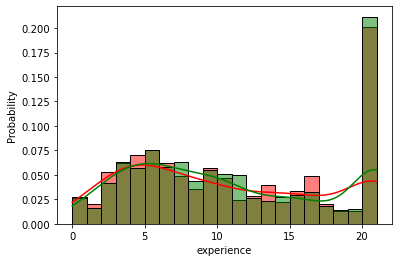

In [317]:
fig = plt.figure()

ax = fig.add_subplot(111)

sns.histplot(data = data.loc[data['target'] == 1], x='experience', stat = 'probability', ax=ax, color='red', kde=True, alpha = 0.5, bins = 21)
sns.histplot(data = data.loc[data['target'] == 0], x='experience', stat = 'probability', ax=ax, color='green', kde=True, alpha = 0.5, bins = 21)

In [337]:
trial = pd.crosstab(data.experience, data.target, normalize = 'columns')
trial

target,0.0,1.0
experience,,
0,0.027286,0.026490
1,0.016224,0.019868
2,0.041298,0.052980
3,0.063422,0.061810
4,0.056785,0.070640
5,0.075221,0.075055
6,0.058260,0.061810
7,0.063422,0.048565
8,0.043510,0.035320


<AxesSubplot:xlabel='experience', ylabel='1.0'>

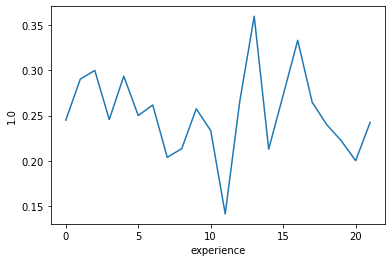

In [357]:
trial = pd.crosstab(data.experience, data.target, normalize = 'index')
sns.lineplot(x = trial.index, y=trial[1.0])

<AxesSubplot:xlabel='company_type', ylabel='company_size'>

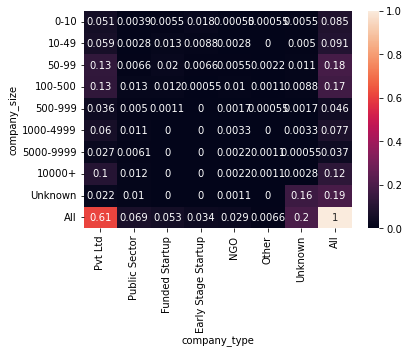

In [362]:
sns.heatmap(pd.crosstab(data.company_size, data.company_type, normalize = True, margins=True), annot = True)